In [2]:
# Data Handling
import csv
import pandas as pd

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Visualizations
import matplotlib.pyplot as plt

# Machine Learning 
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
# Specifiy CSV file path
file_path = r'C:\Users\kolgi\OneDrive - Western Governors University\D212\medical_market_basket.csv'

# Open the CSV file and read it using DictReader
with open(file_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)

# Read the CSV file into a pandas DataFrame then open head
df = pd.read_csv(file_path)

In [4]:
df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [7]:
# Find missing values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Presc01     7501
Presc02     9255
Presc03    10613
Presc04    11657
Presc05    12473
Presc06    13138
Presc07    13633
Presc08    14021
Presc09    14348
Presc10    14607
Presc11    14746
Presc12    14848
Presc13    14915
Presc14    14955
Presc15    14977
Presc16    14994
Presc17    14998
Presc18    14998
Presc19    14999
Presc20    15001
dtype: int64


In [8]:
# Find duplicates
# Check for duplicate rows
duplicates = df.duplicated()

# Display duplicate rows
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
           Presc01   Presc02 Presc03 Presc04 Presc05 Presc06 Presc07 Presc08  \
2              NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4              NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6              NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8              NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
10             NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...            ...       ...     ...     ...     ...     ...     ...     ...   
14996          NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
14997  clopidogrel       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
14998          NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
14999   alprazolam  losartan     NaN     NaN     NaN     NaN     NaN     NaN   
15000          NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      Presc09 Presc10 P

In [9]:
# Retain only the rows where the values in the column named 'Presc01' are not null (or not NaN).
df = df[df['Presc01'].notna()]
df.shape

(7501, 20)

In [10]:
# Initialize an empty list to store lists (From Dr. Kamara, n.d.)
rows = []
# Iterate over rows
for i in range(0, 7501):
    rows.append([str(df.values[i,j])
for j in range(0, 20)])

In [11]:
# Initialize TransactionEncoder
encoder = TransactionEncoder()

# Fit the encoder to the list of lists and transform the data into a boolean array
array = encoder.fit_transform(rows)

# Convert the boolean array into a DataFrame for better visualization
df_encoded = pd.DataFrame(array, columns=encoder.columns_)

# Display the boolean array
df_encoded

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# View all column names (from Dr. Kamara, n.d.)
for col in df_encoded.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [14]:
# Drop the 'nan' column from df_encoded
df_encoded = df_encoded.drop(columns=['nan'], errors='ignore')

# Print the DataFrame after dropping empty columns
df_encoded.shape

(7501, 119)

In [15]:
# Save the filtered DataFrame to a CSV file
df_encoded.to_csv('task3_transformed.csv', index=False)

In [16]:
# Specifiy CSV file path
file_path = r'C:\Users\kolgi\OneDrive - Western Governors University\D212\task 3\task3_transformed.csv'

# Open the CSV file and read it using DictReader
with open(file_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)

# Read the CSV file into a pandas DataFrame then open head
df = pd.read_csv(file_path)

In [17]:
df.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Top 5 Medications:
abilify                      1788
amphetamine salt combo xr    1348
carvedilol                   1306
glyburide                    1282
diazepam                     1229
dtype: int64


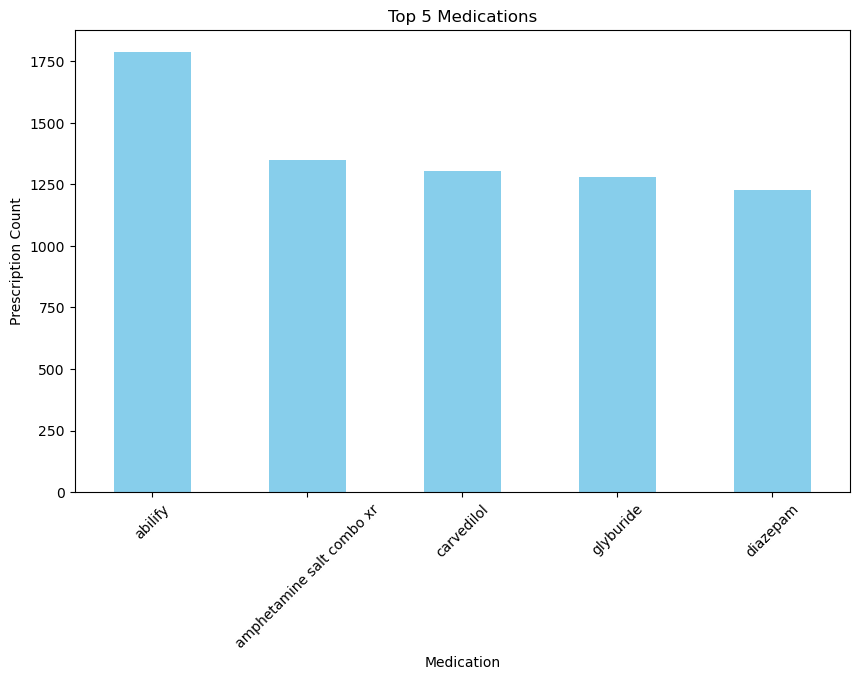

In [19]:
# Count the number of True values for each medication
medication_counts = df.sum(axis=0)

# Get the top 5 medications with the most True values
top_5_medications = medication_counts.nlargest(5)

# Print the top 5 medications
print("Top 5 Medications:")
print(top_5_medications)

# Visualize the top 5 medications
top_5_medications.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Medications')
plt.xlabel('Medication')
plt.ylabel('Prescription Count')
plt.xticks(rotation=45)
plt.savefig("t3_topmedications.png")
plt.show()

In [20]:
# Create frequent itemsets using Apriori algorithm
rules = apriori(df, min_support=0.02, use_colnames=True)
rules

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)
...,...,...
98,0.023064,"(diazepam, lisinopril)"
99,0.023464,"(losartan, diazepam)"
100,0.022930,"(diazepam, metoprolol)"
101,0.020131,"(doxycycline hyclate, glyburide)"


In [21]:
# Generate association rules table
rules_table = association_rules(rules, metric='lift', min_threshold=1)
rules_table.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
5,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
6,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
7,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606


In [22]:
# Sort the association rules by support
sorted_support = rules_table.sort_values(by='support', ascending=False)
sorted_support.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
19,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


In [23]:
# Sort the association rules by confidence
sorted_confidence = rules_table.sort_values(by='confidence', ascending=False)
sorted_confidence.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
25,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
29,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [24]:
# Sort the association rules by lift
sorted_lift = rules_table.sort_values(by='lift', ascending=False)
sorted_lift.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
74,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
75,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
73,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
